## Model Version 5

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()
# need to check (distribution extreme.. check after initial modeling) :  
#    dti, total_rec_late_fee, recoveries, tot_coll_amt, mths_since_rcnt_il, il_util, max_bal_bc, avg_cur_bal,
#    delinq_amnt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mths_since_recent_revol_delinq, tax_liens

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

### Extreme outlier

In [4]:
from sklearn.preprocessing import LabelEncoder
df_plot = df
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df_plot['loan_status'])
df_plot['loan_status'] = label_encoder.transform(df_plot['loan_status'])

shape of data(dti>=600) : (10, 80)


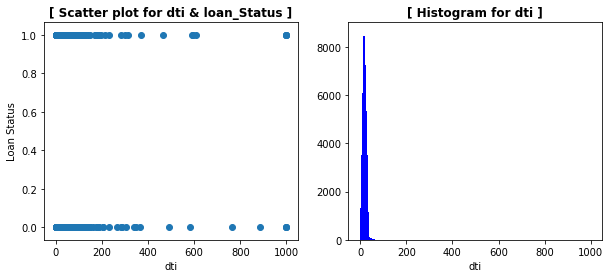

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

##### "dti" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ Scatter plot for dti & loan_Status ]', fontweight="bold")
plt.scatter('dti', 'loan_status', data=df_plot)
plt.xlabel('dti')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['dti'], bins=1000, color="blue")
plt.title('[ Histogram for dti ]', fontweight="bold")
plt.xlabel('dti')

df.dti.unique().shape
print('shape of data(dti>=600) :', df[df['dti'] >= 600].shape)

shape of data(total_rec_late_fee>=500) : (5, 80)


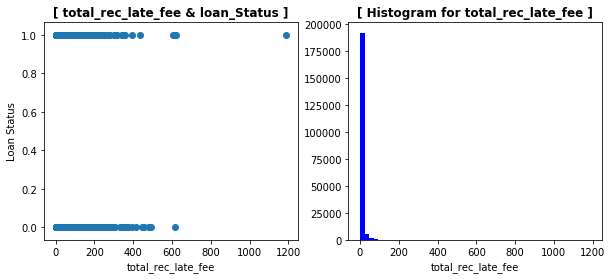

In [6]:
##### "total_rec_late_fee" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ total_rec_late_fee & loan_Status ]', fontweight="bold")
plt.scatter('total_rec_late_fee', 'loan_status', data=df_plot)
plt.xlabel('total_rec_late_fee')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['total_rec_late_fee'], bins=50, color="blue")
plt.title('[ Histogram for total_rec_late_fee ]', fontweight="bold")
plt.xlabel('total_rec_late_fee')

df.dti.unique().shape
print('shape of data(total_rec_late_fee>=500) :', df[df['total_rec_late_fee'] >= 500].shape)

shape of data(tot_coll_amt>=100000) : (6, 80)


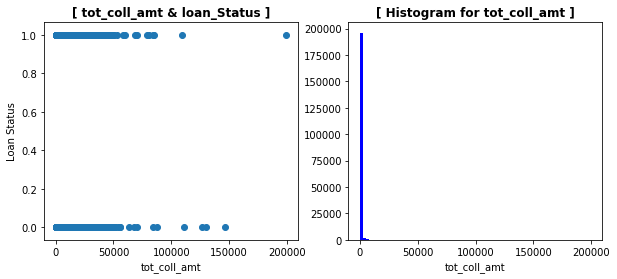

In [7]:
##### "tot_coll_amt" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ tot_coll_amt & loan_Status ]', fontweight="bold")
plt.scatter('tot_coll_amt', 'loan_status', data=df_plot)
plt.xlabel('tot_coll_amt')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['tot_coll_amt'], bins=80, color="blue")
plt.title('[ Histogram for tot_coll_amt ]', fontweight="bold")
plt.xlabel('tot_coll_amt')

df.dti.unique().shape
print('shape of data(tot_coll_amt>=100000) :', df[df['tot_coll_amt'] >= 100000].shape)

In [8]:
# outlier deletion :  dti (>=600, 10 counts)
print('before outlier(dti) removel : ', df.shape)
df = df[df['dti'] < 600]
print('after outlier(dti) removel : ', df.shape)

df = df[df['total_rec_late_fee'] < 500]
print('after outlier(total_rec_late_fee) removel : ', df.shape)

df = df[df['tot_coll_amt'] < 100000]
print('after outlier(tot_coll_amt) removel : ', df.shape)

before outlier(dti) removel :  (200000, 80)
after outlier(dti) removel :  (199990, 80)
after outlier(total_rec_late_fee) removel :  (199985, 80)
after outlier(tot_coll_amt) removel :  (199979, 80)


In [9]:
df = df.drop(['recoveries', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','total_pymnt'], axis=1) 

### 'State' delete (Too many categories & Not important)

In [10]:
df = df.drop(['addr_state'], axis=1)

### dummification for categorical variables

In [11]:
print(df.dtypes.value_counts())

int64      52
float64    13
object      9
dtype: int64


In [12]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [13]:
x = pd.get_dummies(x_old, drop_first=True)

## Modeling with Top 22 important Variables

In [14]:
## Top 22 variables
top22_var = ['total_rec_int','installment','loan_amnt','int_rate','total_rec_late_fee','debt_settlement_flag_Y',
'term_ 60 months','annual_inc','mo_sin_old_rev_tl_op','sub_grade_num','dti','num_rev_tl_bal_gt_0','avg_cur_bal',
'total_rev_hi_lim','bc_open_to_buy','fico_range_mean','total_bc_limit','acc_open_past_24mths',
'home_ownership_RENT','tot_cur_bal','mort_acc','open_rv_24m']

In [15]:
x = x[top22_var]

In [16]:
x.shape

(199979, 22)

### x,y split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [ ]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.2f' % log.score(x_test, y_test))
print('** test pred (initial model) : ', 0.69)

In [27]:
## same logic (for checking)
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('logistic regression accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('** test pred (initial model) : ', 0.69)

logistic regression accuracy : 0.68
** test pred (initial model) :  0.69


In [28]:
test_pred_prob = lr_log.predict_proba(x_test)
print(roc_auc_score(y_test, test_pred_prob[:,1]))
print('** test pred (initial model) : ', 0.747396965817424)

0.7469432867903996
** test pred (initial model) :  0.747396965817424


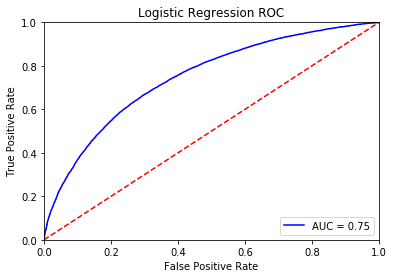

In [55]:
# calculate the fpr and tpr for all thresholds of the classification
lr_test_pred_prob = lr_log.predict_proba(x_test)
lr_preds = lr_test_pred_prob[:,1]
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(y_test, lr_preds)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
plt.title('Logistic Regression ROC')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Random Forest

#### * Before Tuning

In [29]:
start_time = time.time()

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('RF running time : {0:.1f} seconds '.format(time.time()-start_time))

rf accuracy : 0.6880
** accuracy (initial model) :  0.6685
RF running time : 6.8 seconds 


#### * Hyper Parameter tuning 

In [50]:
### It takes very long ###

start_time = time.time()

from sklearn.model_selection import GridSearchCV

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [100,300],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,12,18],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

best parameter:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 300, 'random_state': 1}
best prediction accuracy: 0.7119


In [51]:
### prediction by best param (auto)
rf3_pred = rf_grid_cv.best_estimator_.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy (initial model) : ', 0.7011)
print('RF tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

rf3 accuracy : 0.7131
** accuracy (initial model) :  0.7011
RF tuning & running time : 10935.9 seconds 


In [56]:
rf_test_pred_prob = rf_grid_cv.predict_proba(x_test)
print('rf ROC_AUC Score :', roc_auc_score(y_test, rf_test_pred_prob[:,1]))

rf ROC_AUC Score : 0.7820905501804987


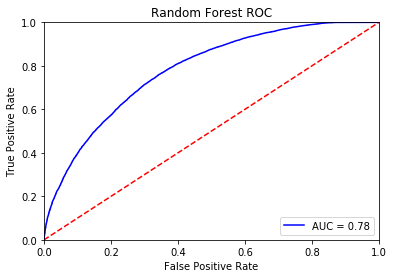

In [57]:
# calculate the fpr and tpr for all thresholds of the classification
rf_test_pred_prob = rf_grid_cv.predict_proba(x_test)
rf_preds = rf_test_pred_prob[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# method I: plt
plt.title('Random Forest ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

debt_settlement_flag_Y    0.222247
sub_grade_num             0.182586
int_rate                  0.152081
total_rec_late_fee        0.125589
term_ 60 months           0.075014
total_rec_int             0.046947
fico_range_mean           0.025002
dti                       0.024924
avg_cur_bal               0.018464
installment               0.018063
loan_amnt                 0.017469
tot_cur_bal               0.012756
bc_open_to_buy            0.012312
acc_open_past_24mths      0.011019
annual_inc                0.010990
mort_acc                  0.008490
open_rv_24m               0.007223
total_bc_limit            0.006848
mo_sin_old_rev_tl_op      0.006505
total_rev_hi_lim          0.005630
dtype: float64


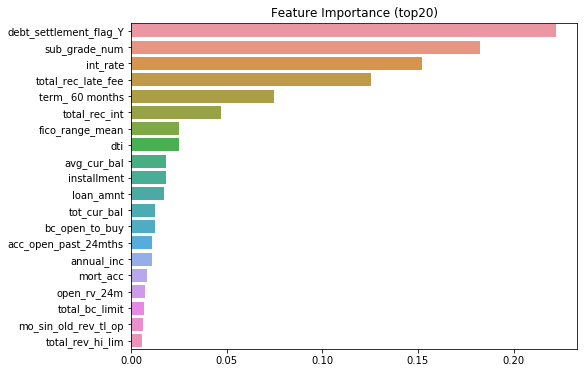

In [53]:
rf_feature_imp = rf3_clf.feature_importances_
rf_feature_imp = pd.Series(rf_feature_imp, index=x_train.columns)
rf_feature_top20 = rf_feature_imp.sort_values(ascending=False)[:20]
rf_feature_top40_rf = rf_feature_imp.sort_values(ascending=False)[:40]

print(rf_feature_top20)

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=rf_feature_top20, y=rf_feature_top20.index)
plt.show()

In [33]:
import dill
dill.dump_session('session_model_v5.db')  ## Save in the middle of the process

### 3. GBM

#### * Before Tuning

In [34]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('gbm accuracy : {0:.4f}'.format(accuracy))
print('** accuracy (initial model) : ', 0.6685)
print('gbm running time : {0:.1f} seconds '.format(time.time()-start_time))

gbm accuracy : 0.6880
** accuracy (initial model) :  0.6685
gbm running time : 44.0 seconds 


#### * Hyper Parameter tuning

In [36]:
start_time = time.time()

gb2_clf = GradientBoostingClassifier(random_state=1)
gb_params = {
    'n_estimatrs': [100,500],
    'learning_rate': [0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb2_clf, param_grid=gb_params, cv=10, verbose=1)
gb_grid_cv.fit(x_train, y_train)

print('best parameter:\n', gb_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 76.2min finished


best parameter:
 {'learning_rate': 0.1, 'n_estimators': 500}
best prediction accuracy: 0.7341


In [37]:
### test with best param 
gb3_pred = gb_grid_cv.best_estimator_.predict(x_test)
gb3_accuracy = accuracy_score(y_test, gb3_pred)

print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
print('GBM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

GBM accuracy(After tuning) : 0.7348
GBM tuning & running time : 4769.0 seconds 


In [58]:
gb_test_pred_prob = gb_grid_cv.predict_proba(x_test)
print('GBM ROC_AUC Score :', roc_auc_score(y_test, gb_test_pred_prob[:,1]))

GBM ROC_AUC Score : 0.8149098598646256


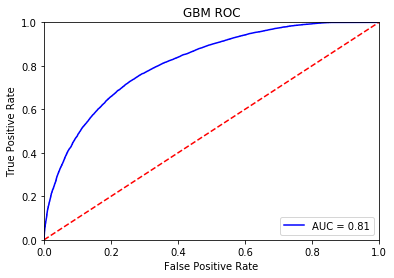

In [59]:
# calculate the fpr and tpr for all thresholds of the classification
GBM_test_pred_prob = gb_grid_cv.predict_proba(x_test)
GBM_preds = GBM_test_pred_prob[:,1]
GBM_fpr, GBM_tpr, GBM_threshold = metrics.roc_curve(y_test, GBM_preds)
GBM_roc_auc = metrics.auc(GBM_fpr, GBM_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('GBM ROC')
plt.plot(GBM_fpr, GBM_tpr, 'b', label = 'AUC = %0.2f' % GBM_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sub_grade_num             0.313277
debt_settlement_flag_Y    0.216301
total_rec_int             0.123306
total_rec_late_fee        0.088498
term_ 60 months           0.049990
loan_amnt                 0.046098
installment               0.040996
int_rate                  0.026984
avg_cur_bal               0.015076
dti                       0.014743
annual_inc                0.011087
num_rev_tl_bal_gt_0       0.007802
fico_range_mean           0.006669
home_ownership_RENT       0.006112
mo_sin_old_rev_tl_op      0.006000
acc_open_past_24mths      0.005737
total_rev_hi_lim          0.004814
mort_acc                  0.004551
open_rv_24m               0.003604
bc_open_to_buy            0.003261
dtype: float64


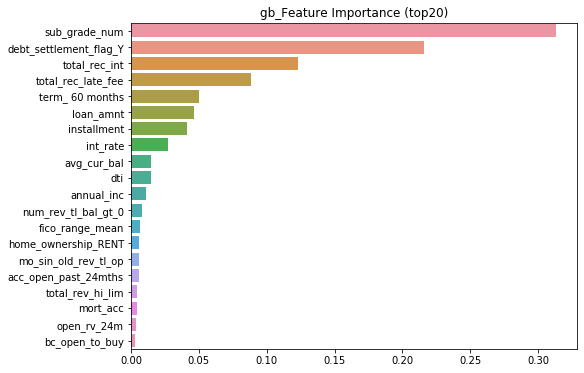

In [38]:
gb_feature_imp = gb_grid_cv.best_estimator_.feature_importances_
gb_feature_imp = pd.Series(gb_feature_imp, index=x_train.columns)
gb_feature_top20 = gb_feature_imp.sort_values(ascending=False)[:20]
gb_feature_top40 = gb_feature_imp.sort_values(ascending=False)[:40]
print(gb_feature_top20)

plt.figure(figsize=(8,6))
plt.title('gb_Feature Importance (top20)')
sns.barplot(x=gb_feature_top20, y=gb_feature_top20.index)
plt.show()

### 4. XGBoost

In [40]:
start_time = time.time()

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_xgb = label_encoder.transform(y_train)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test_xgb = label_encoder.transform(y_test)

In [41]:
dtrain = xgb.DMatrix(data=x_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=x_test, label=y_test_xgb)

In [42]:
xgb_params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 
              'early_stoppings':100}
num_rounds = 400

In [43]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.676491	eval-logloss:0.67652
[1]	train-logloss:0.66268	eval-logloss:0.662951
[2]	train-logloss:0.650993	eval-logloss:0.651298
[3]	train-logloss:0.641154	eval-logloss:0.641568
[4]	train-logloss:0.632793	eval-logloss:0.633238
[5]	train-logloss:0.625525	eval-logloss:0.626079
[6]	train-logloss:0.619232	eval-logloss:0.619867
[7]	train-logloss:0.613797	eval-logloss:0.614576
[8]	train-logloss:0.609104	eval-logloss:0.609926
[9]	train-logloss:0.604925	eval-logloss:0.605837
[10]	train-logloss:0.60126	eval-logloss:0.602291
[11]	train-logloss:0.598075	eval-logloss:0.599186
[12]	train-logloss:0.595216	eval-logloss:0.596393
[13]	train-logloss:0.592318	eval-logloss:0.593564
[14]	train-logloss:0.589999	eval-logloss:0.59125
[15]	train-logloss:0.587989	eval-logloss:0.589319
[16]	train-logloss:0.586	eval-logloss:0.587374
[17]	train-logloss:0.583892	eval-logloss:0.585371
[18]	train-logloss:0.582324	eval-logloss:0.583885
[19]	train-logloss:0.580833	eval-logloss:0.582405
[20]	train-loglos

[164]	train-logloss:0.524426	eval-logloss:0.52953
[165]	train-logloss:0.52431	eval-logloss:0.529445
[166]	train-logloss:0.524224	eval-logloss:0.529364
[167]	train-logloss:0.524057	eval-logloss:0.529217
[168]	train-logloss:0.523939	eval-logloss:0.529123
[169]	train-logloss:0.52389	eval-logloss:0.52908
[170]	train-logloss:0.523784	eval-logloss:0.528993
[171]	train-logloss:0.523694	eval-logloss:0.528924
[172]	train-logloss:0.523605	eval-logloss:0.528859
[173]	train-logloss:0.523527	eval-logloss:0.528775
[174]	train-logloss:0.523471	eval-logloss:0.528731
[175]	train-logloss:0.523283	eval-logloss:0.528563
[176]	train-logloss:0.52301	eval-logloss:0.528313
[177]	train-logloss:0.522963	eval-logloss:0.528273
[178]	train-logloss:0.522836	eval-logloss:0.52816
[179]	train-logloss:0.522755	eval-logloss:0.528086
[180]	train-logloss:0.522705	eval-logloss:0.528041
[181]	train-logloss:0.522634	eval-logloss:0.528009
[182]	train-logloss:0.522546	eval-logloss:0.527925
[183]	train-logloss:0.522505	eval-log

[326]	train-logloss:0.512371	eval-logloss:0.520064
[327]	train-logloss:0.51233	eval-logloss:0.520038
[328]	train-logloss:0.512316	eval-logloss:0.520022
[329]	train-logloss:0.512287	eval-logloss:0.520031
[330]	train-logloss:0.512212	eval-logloss:0.51998
[331]	train-logloss:0.512089	eval-logloss:0.519879
[332]	train-logloss:0.512025	eval-logloss:0.51984
[333]	train-logloss:0.512	eval-logloss:0.519844
[334]	train-logloss:0.511865	eval-logloss:0.519732
[335]	train-logloss:0.511783	eval-logloss:0.519681
[336]	train-logloss:0.511738	eval-logloss:0.519662
[337]	train-logloss:0.511679	eval-logloss:0.519612
[338]	train-logloss:0.511646	eval-logloss:0.519597
[339]	train-logloss:0.511607	eval-logloss:0.519581
[340]	train-logloss:0.511583	eval-logloss:0.519564
[341]	train-logloss:0.511541	eval-logloss:0.519532
[342]	train-logloss:0.511527	eval-logloss:0.519527
[343]	train-logloss:0.511495	eval-logloss:0.519523
[344]	train-logloss:0.511463	eval-logloss:0.519504
[345]	train-logloss:0.511432	eval-log

In [44]:
pred_probs = xgb_model.predict(dtest)
xgb_preds = [1 if x>0.5 else 0 for x in pred_probs]

In [45]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test_xgb, pred)
    accuracy = accuracy_score(y_test_xgb , pred)
    precision = precision_score(y_test_xgb , pred)
    recall = recall_score(y_test_xgb , pred)
    print('confusion matrix')
    print(confusion)
    print('XGBoost Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [46]:
get_clf_eval(y_test_xgb, xgb_preds)
print('** accuracy (initial model) : ', 'Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045')
print('XGBoost running time : {0:.1f} seconds '.format(time.time()-start_time))

confusion matrix
[[12163  6438]
 [ 4224 17171]]
XGBoost Accuracy: 0.7334, Precision: 0.7273, Recall: 0.8026
** accuracy (initial model) :  Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045
XGBoost running time : 37.7 seconds 


In [47]:
xgb_model.get_score(importance_type='weight')

{'sub_grade_num': 85,
 'debt_settlement_flag_Y': 92,
 'total_rec_late_fee': 108,
 'term_ 60 months': 102,
 'int_rate': 187,
 'total_rec_int': 623,
 'avg_cur_bal': 56,
 'loan_amnt': 220,
 'dti': 82,
 'tot_cur_bal': 47,
 'home_ownership_RENT': 22,
 'acc_open_past_24mths': 43,
 'installment': 310,
 'fico_range_mean': 42,
 'mort_acc': 27,
 'open_rv_24m': 25,
 'mo_sin_old_rev_tl_op': 116,
 'num_rev_tl_bal_gt_0': 101,
 'annual_inc': 114,
 'bc_open_to_buy': 77,
 'total_bc_limit': 50,
 'total_rev_hi_lim': 97}

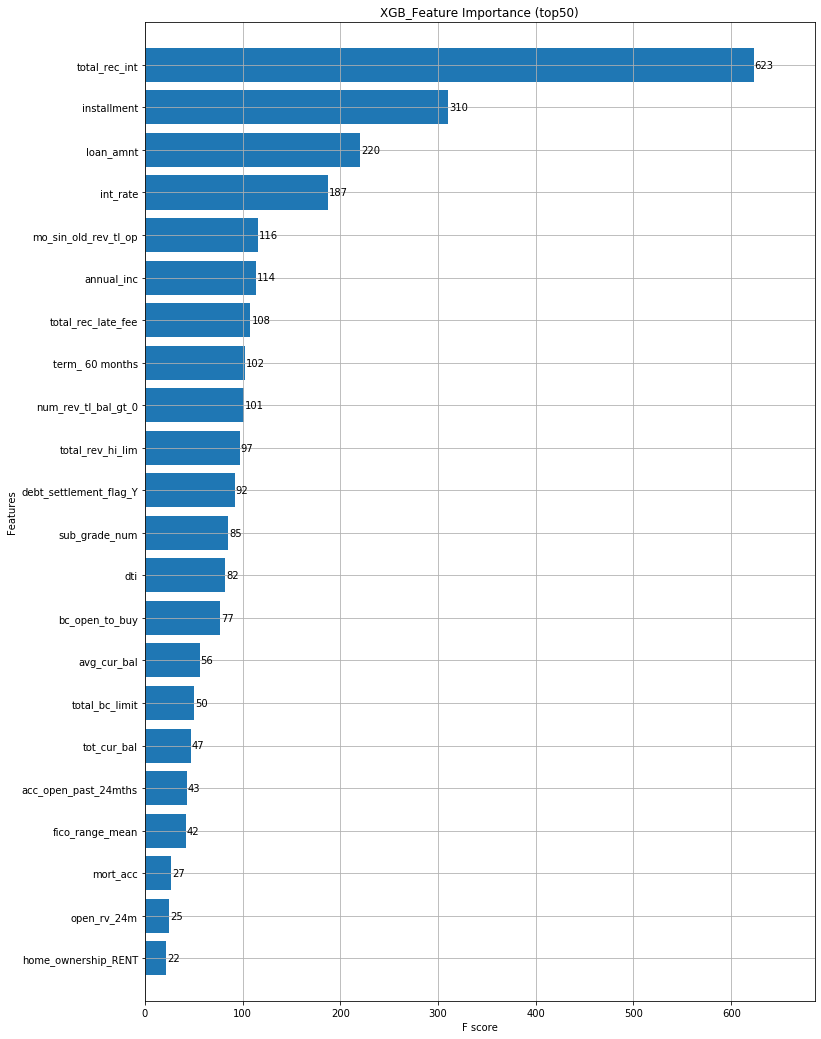

In [48]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)
plt.title('XGB_Feature Importance (top50)')
plt.show()

### 5. SVM (SVC)

In [62]:
start_time = time.time()

n_estimators = 10
svm_clf = LinearSVC(random_state=1)
svm_clf.fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)

print('SVM train score : {0:.1f} seconds ', svm_clf.score(x_train, y_train))
print('SVM pred test score : {0:.1f} seconds ', svm_clf.score(x_test, y_test))

SVM train score : {0:.1f} seconds  0.5446078645856122
SVM pred test score : {0:.1f} seconds  0.5495549554955496


#### * Hyper Parameter tuning

In [63]:
start_time = time.time()

svm2_clf = LinearSVC(random_state=1)
svm_params = {'C': [1, 10, 100, 1000]}

# GridSearchCV
svm_grid_cv = GridSearchCV(svm2_clf, param_grid=svm_params, cv=5)
svm_grid_cv.fit(x_train,y_train)
svm2_pred = svm_grid_cv.predict(x_test)

print('SVM best parameter:\n', svm_grid_cv.best_params_)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('SVM tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

SVM best parameter:
 {'C': 1}
SVM best prediction accuracy: 0.5885
SVM best prediction for test accuracy: 0.5496
SVM tuning & running time : 998.9 seconds 


In [ ]:
# svm_test_pred_prob = svm_grid_cv.predict_proba(x_test)
# print('SVM ROC_AUC Score :', roc_auc_score(y_test, svm_test_pred_prob[:,1]))

                               0       abs
sub_grade_num          -0.021203  0.021203
int_rate               -0.015633  0.015633
total_rec_late_fee     -0.014117  0.014117
dti                    -0.006088  0.006088
acc_open_past_24mths   -0.005442  0.005442
open_rv_24m            -0.003817  0.003817
num_rev_tl_bal_gt_0    -0.003692  0.003692
installment             0.001648  0.001648
debt_settlement_flag_Y -0.001374  0.001374
fico_range_mean         0.000913  0.000913
mort_acc                0.000896  0.000896
term_ 60 months        -0.000634  0.000634
home_ownership_RENT    -0.000476  0.000476
total_rec_int           0.000112  0.000112
loan_amnt              -0.000103  0.000103
mo_sin_old_rev_tl_op   -0.000051  0.000051
avg_cur_bal             0.000016  0.000016
annual_inc             -0.000013  0.000013
tot_cur_bal             0.000007  0.000007
bc_open_to_buy         -0.000005  0.000005


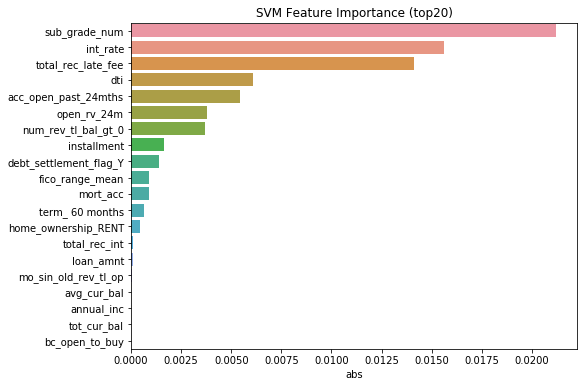

In [64]:
svm_feature_imp = pd.DataFrame(svm_grid_cv.best_estimator_.coef_, columns=x_train.columns).transpose()
svm_feature_imp['abs']=svm_feature_imp[0].apply(np.abs).round(6)
svm_feature_top20 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:20]
svm_feature_top40 = svm_feature_imp.sort_values(by= ['abs'], ascending=False)[:40]

print(svm_feature_top20)

plt.figure(figsize=(8,6))
plt.title('SVM Feature Importance (top20)')
sns.barplot(x=svm_feature_top20['abs'], y=svm_feature_top20.index)
plt.show()

### 6. naive_bayes (GaussianNB)

In [76]:
start_time = time.time()

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)
gnb_pred = gnb_clf.predict(x_test)

# Evaluate accuracy
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
print('Naive_bayes running time : {0:.1f} seconds '.format(time.time()-start_time))

naive_bayes prediction accuracy: : {0:.4f} 0.6386138613861386
Naive_bayes running time : 0.2 seconds 


### 7. Neural Net (Simple ver.)

In [61]:
start_time = time.time()

NN_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN_clf.fit(x_train, y_train)
NN_clf_pred = NN_clf.predict(x_test)

# Evaluate accuracy
print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y_train), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN_clf_pred))
print('Neural Net running time : {0:.1f} seconds '.format(time.time()-start_time))

NN Score prediction accuracy: : {0:.4f} 0.4604
NN test prediction accuracy: : {0:.4f} 0.46507150715071505
Neural Net running time : 0.6 seconds 


#### * Hyper Parameter tuning

In [67]:
start_time = time.time()

NN2_clf = MLPClassifier(max_iter=100)
NN2_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

NN2_grid_cv = GridSearchCV(NN2_clf, param_grid=NN2_params, cv=5)
NN2_grid_cv.fit(x_train,y_train)
NN2_pred = NN2_grid_cv.predict(x_test)

print('Neural Net best parameter:\n', NN2_grid_cv.best_params_)
print('Neural Net best prediction accuracy: {0:.4f}'.format(NN2_grid_cv.best_score_))
print('Neural Net best prediction (test accuracy) : {0:.4f}' .format(accuracy_score(y_test, NN2_pred)))
print('Neural Net  tuning & running time : {0:.1f} seconds '.format(time.time()-start_time))

Neural Net best parameter:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Net best prediction accuracy: 0.6265
Neural Net best prediction (test accuracy) : 0.6176
Neural Net  tuning & running time : 8312.7 seconds 


In [68]:
nn_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
print('NN ROC_AUC Score :', roc_auc_score(y_test, nn_test_pred_prob[:,1]))

NN ROC_AUC Score : 0.6511057266243465


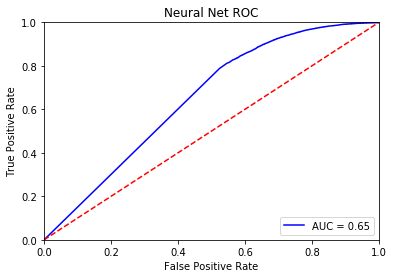

In [69]:
# calculate the fpr and tpr for all thresholds of the classification
NN_test_pred_prob = NN2_grid_cv.predict_proba(x_test)
NN_preds = NN_test_pred_prob[:,1]
NN_fpr, NN_tpr, NN_threshold = metrics.roc_curve(y_test, NN_preds)
NN_roc_auc = metrics.auc(NN_fpr, NN_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Neural Net ROC')
plt.plot(NN_fpr, NN_tpr, 'b', label = 'AUC = %0.2f' % NN_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# %matplotlib inline

# nn_feature_imp = NN2_grid_cv.best_estimator_.coefs_
# nn_feature_imp = pd.Series(NN2_grid_cv, index=x_train.columns)
# nn_feature_top20 = nn_feature_imp.sort_values(ascending=False)[:20]
# nn_feature_top40_svm = nn_feature_imp.sort_values(ascending=False)[:40]

# print(feature_top20)

# plt.figure(figsize=(8,6))
# plt.title('NN Feature Importance (top20)')
# sns.barplot(x=nn_feature_top20, y=nn_feature_top20.index)
# plt.show()

In [74]:
print('RF\n', feature_top40_rf,'\n')
print('GBM\n', gb_feature_top40,'\n')
print('XGB\n', xgb_model.get_score(importance_type='weight'), '\n')
print('SVM', svm_feature_top40,'\n')
# print('NN\n', NN_feature_imp_top40,'\n')

RF
 debt_settlement_flag_Y    0.222247
sub_grade_num             0.182586
int_rate                  0.152081
total_rec_late_fee        0.125589
term_ 60 months           0.075014
total_rec_int             0.046947
fico_range_mean           0.025002
dti                       0.024924
avg_cur_bal               0.018464
installment               0.018063
loan_amnt                 0.017469
tot_cur_bal               0.012756
bc_open_to_buy            0.012312
acc_open_past_24mths      0.011019
annual_inc                0.010990
mort_acc                  0.008490
open_rv_24m               0.007223
total_bc_limit            0.006848
mo_sin_old_rev_tl_op      0.006505
total_rev_hi_lim          0.005630
num_rev_tl_bal_gt_0       0.005441
home_ownership_RENT       0.004399
dtype: float64 

GBM
 sub_grade_num             0.313277
debt_settlement_flag_Y    0.216301
total_rec_int             0.123306
total_rec_late_fee        0.088498
term_ 60 months           0.049990
loan_amnt                 0.0

In [77]:
print('logistic regression accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))
get_clf_eval(y_test_xgb, xgb_preds)
print('SVM best prediction accuracy: {0:.4f}'.format(svm_grid_cv.best_score_))
print('SVM best prediction for test accuracy: : {0:.4f}' .format(accuracy_score(y_test, svm2_pred)))
print('naive_bayes prediction accuracy: : {0:.4f}', accuracy_score(y_test, gnb_pred))
#print('NN Score prediction accuracy: : {0:.4f}',round(NN_clf.score(x_train,y), 4))
print('NN test prediction accuracy: : {0:.4f}', accuracy_score(y_test, NN2_pred))

logistic regression accuracy : 0.68
rf3 accuracy : 0.7124
GBM accuracy(After tuning) : 0.7348
confusion matrix
[[12163  6438]
 [ 4224 17171]]
XGBoost Accuracy: 0.7334, Precision: 0.7273, Recall: 0.8026
SVM best prediction accuracy: 0.5885
SVM best prediction for test accuracy: : 0.5496
naive_bayes prediction accuracy: : {0:.4f} 0.6386138613861386
NN test prediction accuracy: : {0:.4f} 0.6175617561756176


In [78]:
import dill
dill.dump_session('session_model_v5_11.db')  ## Save

# import dill
# dill.load_session('session_model_v4.db')  ## Restore

ValueError: ctypes objects containing pointers cannot be pickled